In [1]:
import numpy as np
import pandas as pd

### 读取数据

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### 显示数据

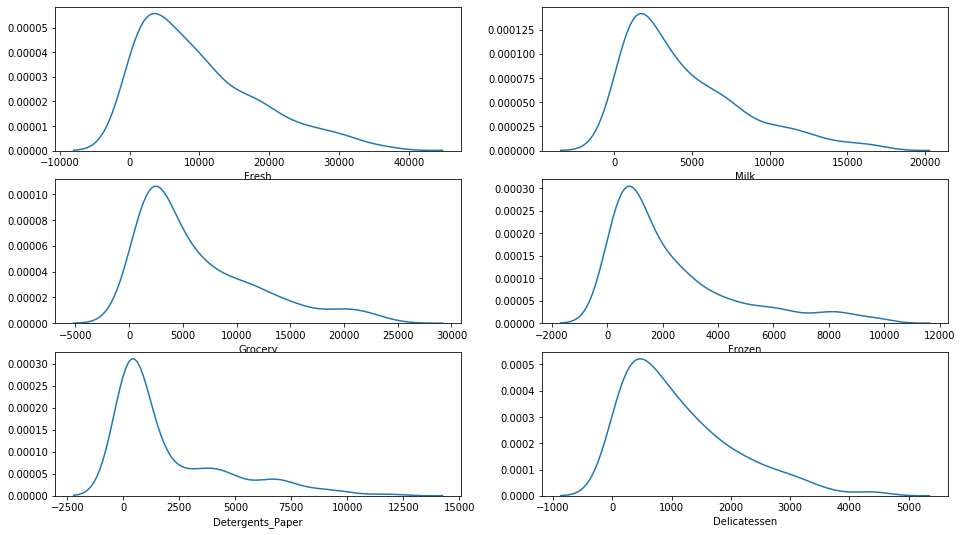

In [4]:
# 显示数据，去除大于95%的极端值
plt.figure(figsize=(16, 9))
for i, col in enumerate(list(data.columns)[1:]):
    plt.subplot(321 + i)
    q95 = np.percentile(data[col], 95)
    sns.distplot(data[data[col] < q95][col], hist=False)
plt.show()

### 数据预处理，去掉极值数据

In [5]:
features = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]

ids = []
for i in list(features.columns):
    left = np.percentile(features[i], 25) # 前25%
    right = np.percentile(features[i], 75) # 后25%
    interval = 1.6 * (right - left) / 2
    low = left - interval
    high = right + interval
    ids.extend(list(features[(features[i] <= low) | (features[i] >= high)].index))
ids = list(set(ids))
features = features.drop(ids)

### PCA降维，降到两维

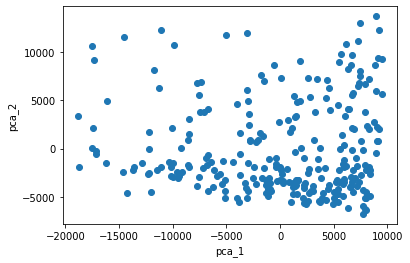

In [6]:
# 每一列均值
data_mean = np.mean(features, axis=0)

# 均值归一
features = features - data_mean

# 协方差
cov = np.cov(features.transpose())

# 特征值和特征向量
eigVals, eigVectors = np.linalg.eig(cov)

# 选择前两个特征向量
pca_mat = eigVectors[:, :2]
pca_data = np.dot(features, pca_mat)
pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])

# 两个主成分的散点图
plt.subplot(111)
plt.scatter(pca_data['pca1'], pca_data['pca2'])
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.show()

In [7]:
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### K-means聚类

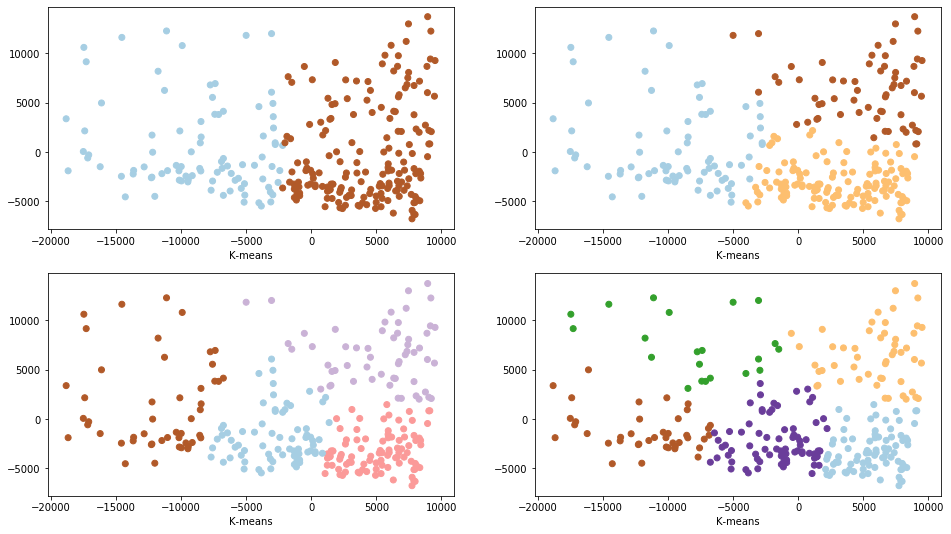

In [8]:
random_state = 80 # 随机数种子
n_cluster = np.arange(2, 6) # 聚簇为2 ~ 5
plt.figure(figsize=(16, 9))
for i, k in zip([0, 1, 2, 3], n_cluster):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    cluster1 = kmeans.fit_predict(pca_data)
    
    # 绘图
    plt.subplot(221 + i)
    plt.scatter(pca_data['pca1'], pca_data['pca2'], c=cluster1, cmap=plt.cm.Paired)
    plt.xlabel('K-means')
plt.show()

### 轮廓分析聚类效果

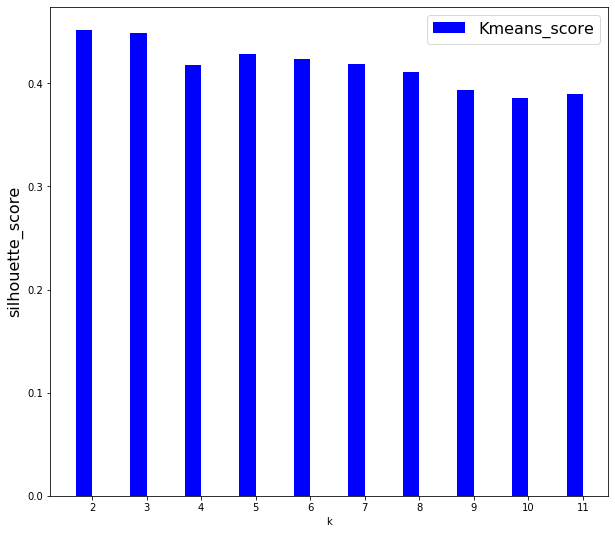

In [10]:
score = [] # 存储结果
random_state = 80 # 种子
n_cluster = np.arange(2, 12) # 2~11
for k in n_cluster:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    cluster = kmeans.fit_predict(pca_data)
    score.append(silhouette_score(pca_data, cluster))

# 绘图
sil_score = pd.DataFrame({'k': np.arange(2, 12), 'score_kmean': score})
plt.figure(figsize=(10, 9))
plt.bar(sil_score['k'] - 0.15, sil_score['score_kmean'], width=0.3, facecolor='blue', label='Kmeans_score')
plt.xticks(np.arange(2, 12))
plt.legend(fontsize=16)
plt.ylabel('silhouette_score', fontsize=16)
plt.xlabel('k')
plt.show()